# Simulation of congestion in a warehouse


### Libraries:

In [1]:
import numpy as np
import pandas as pd

## Extracting the center of distribution(warehouse) information:

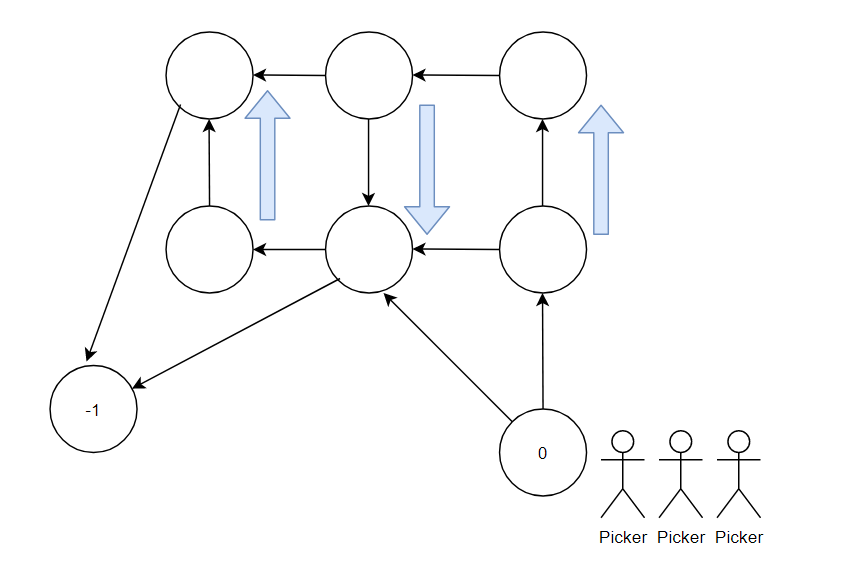

In [2]:
ots = pd.read_csv("data/ot.csv",sep=',')
ots=ots.sort_values('Order')
xlsx_file = "data/layout.xlsx"
layout = pd.read_excel(xlsx_file, sheet_name="layout")
adj=pd.read_excel(xlsx_file, sheet_name="adyacencia")
num_of_orders=len(ots['Order'].unique())
aisles=layout['aisle'].unique()

In [3]:
ots

,Order,Cod.Prod
0,1,9.0
1,2,69.0
2,2,42.0
3,2,44.0
4,2,27.0
...,...,...
79,22,22.0
84,22,72.0
86,23,65.0
85,23,1.0


In [4]:
layout

,Product,order,aisle,use,direction,rack,slot_large,slot_width,slot_height,aisle_large,aisle_width
0,1,1,11,Pallet Pck General,up,left,9999,9999,9999,20,9999
1,2,2,11,Pallet Pck General,up,right,9999,9999,9999,20,9999
2,3,3,11,Pallet Pck General,up,left,9999,9999,9999,20,9999
3,4,4,11,Pallet Pck General,up,right,9999,9999,9999,20,9999
4,5,5,11,Pallet Pck General,up,left,9999,9999,9999,20,9999
...,...,...,...,...,...,...,...,...,...,...,...
67,68,8,61,Pallet Pck General,down,right,9999,9999,9999,20,9999
68,69,9,61,Pallet Pck General,down,left,9999,9999,9999,20,9999
69,70,10,61,Pallet Pck General,down,right,9999,9999,9999,20,9999
70,71,11,61,Pallet Pck General,down,left,9999,9999,9999,20,9999


In [5]:
adj

,aisle,adjacent,distance
0,0,11,1
1,0,31,1
2,0,51,1
3,11,12,1
4,11,21,1
5,12,22,1
6,22,21,1
7,22,32,1
8,21,31,1
9,21,-1,1


In [6]:
aisles

array([11, 12, 22, 21, 31, 32, 42, 41, 51, 52, 62, 61], dtype=int64)

In [7]:
num_of_orders

23

## Pseudocode:

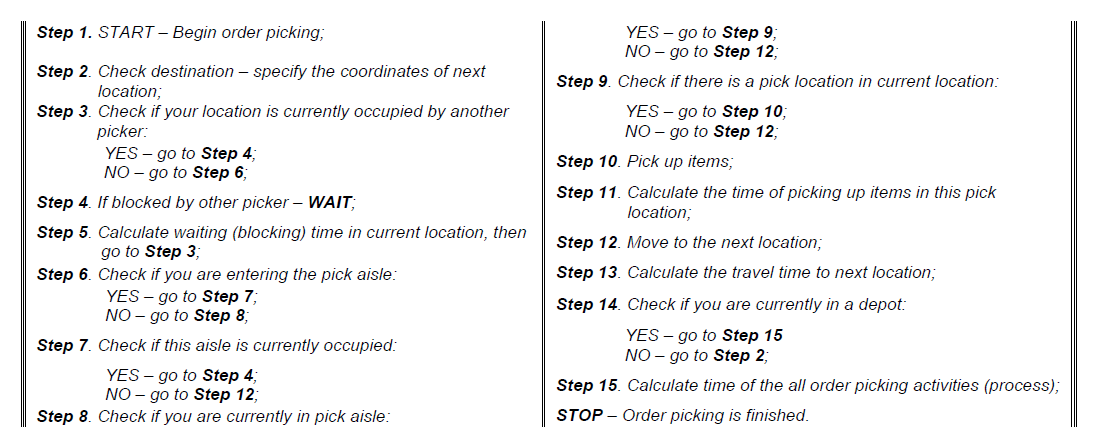

## Some Considerations:

* Equal characteristics to all items
* Narrow aisles
* constant velocity for all pickers
* constant picking time for all pickers

In [8]:
picking_time=10 #[s]
velocity=4 #[m/s]

## Initializing some variables:

In [9]:
list1=[]
for x in range(num_of_orders): 
  obj=list(ots.loc[ots["Order"]==x+1]["Cod.Prod"])
  list1.append(obj)
orders=np.array(list1)

l=[]
for aisle in aisles:
  l.append([aisle,False, 0])
aisle_bool=pd.DataFrame(l,columns=["aisle","ocuppied","picker"])

In [10]:
orders

array([list([9.0]), list([69.0, 42.0, 44.0, 27.0, 37.0, 54.0, 3.0]),
       list([2.0, 1.0, 62.0, 68.0]),
       list([63.0, 70.0, 69.0, 66.0, 72.0, 13.0, 16.0, 41.0]),
       list([44.0, 58.0, 67.0]), list([70.0, 58.0]),
       list([3.0, 57.0, 58.0, 66.0, 5.0, 22.0, 52.0, 55.0]),
       list([55.0, 48.0, 9.0]), list([55.0]), list([20.0, 67.0, 8.0]),
       list([57.0, 61.0]), list([57.0]),
       list([19.0, 63.0, 59.0, 69.0, 24.0, 34.0, 22.0]), list([55.0]),
       list([35.0, 17.0, 65.0, 14.0, 72.0, 56.0, 27.0, 59.0]),
       list([49.0, 13.0, 29.0, 2.0, 50.0]), list([14.0]),
       list([33.0, 5.0, 30.0]), list([52.0, 58.0, 7.0, 43.0, 35.0, 20.0]),
       list([6.0]), list([25.0, 6.0]),
       list([43.0, 34.0, 32.0, 1.0, 11.0, 53.0, 22.0, 72.0]),
       list([65.0, 1.0, 63.0])], dtype=object)

In [11]:
aisle_bool

,aisle,ocuppied,picker
0,11,False,0
1,12,False,0
2,22,False,0
3,21,False,0
4,31,False,0
5,32,False,0
6,42,False,0
7,41,False,0
8,51,False,0
9,52,False,0


## The Code:

In [12]:
import code

In [13]:
help(code.assignment_of_orders)

Help on function assignment_of_orders in module code:

assignment_of_orders(pickers: list, orders_enum: list, num_of_pickers: int) -> list
    This function assigns orders to the pickers that are not working



In [14]:
help(code.next_move)

Help on function next_move in module code:

next_move(aisle_to_go: float, act_aisle: float, adj: pandas.core.frame.DataFrame) -> float
    Returns the next aisle to visit in a route
    from a starting aisle to another aisle



In [15]:
help(code.sort)

Help on function sort in module code:

sort(order: list, aisles: numpy.ndarray)
    sort the orders according to the aisles



In [16]:
help(code.route_exist)


Help on function route_exist in module code:

route_exist(a1: float, a2: float, adj: pandas.core.frame.DataFrame) -> bool
    returns true if exist any route from a starting aisle to another aisle, false in other case



In [17]:
help(code.routing)

Help on function routing in module code:

routing(aisle_to_go: float, act_aisle: float) -> list
    returns the route from an initial aisle, to another aisle



In [18]:
help(code.product_in_aisle)

Help on function product_in_aisle in module code:

product_in_aisle(prod_code: float, layout: pandas.core.frame.DataFrame)
    returns the aisle where you can find the product



In [19]:
help(code.ocuppied)

Help on function ocuppied in module code:

ocuppied(aisle: float, aisle_bool: pandas.core.frame.DataFrame) -> bool
    returns true if the aisle is ocuppied, false if not



In [20]:
help(code.time)

Help on function time in module code:

time(orders: numpy.ndarray, num_of_pickers: int, ots: pandas.core.frame.DataFrame, layout: pandas.core.frame.DataFrame, adj: pandas.core.frame.DataFrame)
    Parameters
    ----------
    orders: array with the products to pick in the orders
    ots:Dataframe with orders
    layout: Dataframe with information about the layout of the warehouse
    adj: Dataframe with information about the adjacence of the aisles
    
    Returns
    -----------
    t:Float
    
        Final function, returns the total time in which the orders are completed



In [21]:
code.time(orders,1,ots,layout,adj)

----------------------------------------
picker: 1 in the order 1 

actual aisle: 0
Next product to pick: 9.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 0.0
----------------------------------------
picker: 1 in the order 1 

actual aisle: 11
Next product to pick: 9.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 0.0875
----------------------------------------
picker: 1 in the order 1 

actual aisle: 12
Next product to pick: 9.0
----------------------------------------
picker: 1 in the order 1 

actual aisle: 12
picker going to the depot
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 0.3416666666666667
----------------------------------------
picker: 1 in the order 1 

actual aisle: 22
picker going to the depot
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 0.42916666666666664
----------------------------------------
picker: 1 in

----------------------------------------
picker: 1 in the order 4 

actual aisle: 12
Next product to pick: 13.0
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 5.0875
----------------------------------------
picker: 1 in the order 4 

actual aisle: 22
Next product to pick: 13.0
----------------------------------------
picker: 1 in the order 4 

actual aisle: 22
Next product to pick: 16.0
----------------------------------------
picker: 1 in the order 4 

actual aisle: 22
Next product to pick: 41.0
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 5.508333333333334
----------------------------------------
picker: 1 in the order 4 

actual aisle: 21
Next product to pick: 41.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 5.595833333333333
----------------------------------------
picker: 1 in the order 4 

actual aisle: 31
Next product to pick: 41.0
next aisle to visit: 32
pic

next aisle to visit: 62
picker moves to the aisle 62 

aisle 52  free  at the minute: 9.729166666666666
----------------------------------------
picker: 1 in the order 6 

actual aisle: 62
Next product to pick: 70.0
next aisle to visit: 61
picker moves to the aisle 61 

aisle 62  free  at the minute: 9.816666666666666
----------------------------------------
picker: 1 in the order 6 

actual aisle: 61
Next product to pick: 70.0
----------------------------------------
picker: 1 in the order 6 

actual aisle: 61
picker going to the depot
next location: Depot
----------------------------------------
picker: 1 in the order 6 

actual aisle: -1
picker going to the depot
picker finished order 6 at the minute: 9.991666666666667
----------------------------------------
picker: 1 in the order 7 

actual aisle: 0
Next product to pick: 3.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 9.991666666666667
----------------------------------------
picker: 1 in t

next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 14.204166666666667
----------------------------------------
picker: 1 in the order 9 

actual aisle: 32
Next product to pick: 55.0
next aisle to visit: 42
picker moves to the aisle 42 

aisle 32  free  at the minute: 14.291666666666666
----------------------------------------
picker: 1 in the order 9 

actual aisle: 42
Next product to pick: 55.0
next aisle to visit: 41
picker moves to the aisle 41 

aisle 42  free  at the minute: 14.379166666666666
----------------------------------------
picker: 1 in the order 9 

actual aisle: 41
Next product to pick: 55.0
next aisle to visit: 51
picker moves to the aisle 51 

aisle 41  free  at the minute: 14.466666666666667
----------------------------------------
picker: 1 in the order 9 

actual aisle: 51
Next product to pick: 55.0
next aisle to visit: 52
picker moves to the aisle 52 

aisle 51  free  at the minute: 14.554166666666667
---------------------------

next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 17.766666666666666
----------------------------------------
picker: 1 in the order 12 

actual aisle: 12
Next product to pick: 57.0
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 17.854166666666668
----------------------------------------
picker: 1 in the order 12 

actual aisle: 22
Next product to pick: 57.0
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 17.941666666666666
----------------------------------------
picker: 1 in the order 12 

actual aisle: 21
Next product to pick: 57.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 18.029166666666665
----------------------------------------
picker: 1 in the order 12 

actual aisle: 31
Next product to pick: 57.0
next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 18.116666666666667
-----------------------

next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 22.266666666666666
----------------------------------------
picker: 1 in the order 15 

actual aisle: 22
Next product to pick: 17.0
----------------------------------------
picker: 1 in the order 15 

actual aisle: 22
Next product to pick: 14.0
----------------------------------------
picker: 1 in the order 15 

actual aisle: 22
Next product to pick: 27.0
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 22.6875
----------------------------------------
picker: 1 in the order 15 

actual aisle: 21
Next product to pick: 27.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 22.775
----------------------------------------
picker: 1 in the order 15 

actual aisle: 31
Next product to pick: 27.0
----------------------------------------
picker: 1 in the order 15 

actual aisle: 31
Next product to pick: 35.0
next aisle to visit: 32
picker

next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 27.591666666666665
----------------------------------------
picker: 1 in the order 18 

actual aisle: 12
Next product to pick: 30.0
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 27.679166666666667
----------------------------------------
picker: 1 in the order 18 

actual aisle: 22
Next product to pick: 30.0
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 27.766666666666666
----------------------------------------
picker: 1 in the order 18 

actual aisle: 21
Next product to pick: 30.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 27.854166666666668
----------------------------------------
picker: 1 in the order 18 

actual aisle: 31
Next product to pick: 30.0
----------------------------------------
picker: 1 in the order 18 

actual aisle: 31
Next product to pick: 33.0
next aisle to v

----------------------------------------
picker: 1 in the order 20 

actual aisle: 62
picker going to the depot
next aisle to visit: 61
picker moves to the aisle 61 

aisle 62  free  at the minute: 31.908333333333335
----------------------------------------
picker: 1 in the order 20 

actual aisle: 61
picker going to the depot
next location: Depot
----------------------------------------
picker: 1 in the order 20 

actual aisle: -1
picker going to the depot
picker finished order 20 at the minute: 31.916666666666668
----------------------------------------
picker: 1 in the order 21 

actual aisle: 0
Next product to pick: 6.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 31.916666666666668
----------------------------------------
picker: 1 in the order 21 

actual aisle: 11
Next product to pick: 6.0
----------------------------------------
picker: 1 in the order 21 

actual aisle: 11
Next product to pick: 25.0
next aisle to visit: 12
picker moves to

next aisle to visit: 42
picker moves to the aisle 42 

aisle 32  free  at the minute: 36.21666666666667
----------------------------------------
picker: 1 in the order 23 

actual aisle: 42
Next product to pick: 65.0
next aisle to visit: 41
picker moves to the aisle 41 

aisle 42  free  at the minute: 36.30416666666667
----------------------------------------
picker: 1 in the order 23 

actual aisle: 41
Next product to pick: 65.0
next aisle to visit: 51
picker moves to the aisle 51 

aisle 41  free  at the minute: 36.391666666666666
----------------------------------------
picker: 1 in the order 23 

actual aisle: 51
Next product to pick: 65.0
next aisle to visit: 52
picker moves to the aisle 52 

aisle 51  free  at the minute: 36.479166666666664
----------------------------------------
picker: 1 in the order 23 

actual aisle: 52
Next product to pick: 65.0
next aisle to visit: 62
picker moves to the aisle 62 

aisle 52  free  at the minute: 36.56666666666667
--------------------------

36.99583333333333

In [23]:
code.time(orders,2,ots,layout,adj)

----------------------------------------
picker: 1 in the order 1 

actual aisle: 0
Next product to pick: 9.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 0.0
----------------------------------------
picker: 2 in the order 2 

actual aisle: 0
Next product to pick: 3.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 0.004166666666666667
----------------------------------------
picker: 1 in the order 1 

actual aisle: 11
Next product to pick: 9.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 0.25416666666666665
----------------------------------------
picker: 2 in the order 2 

actual aisle: 0
Next product to pick: 3.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 0.25833333333333336
----------------------------------------
picker: 1 in the order 1 

actual aisle: 12
Next product to pick: 9.0
----------------------------------------
picker: 2 in the order 2 

a

picker moves to the aisle 12 

aisle 11  free  at the minute: 4.391666666666667
----------------------------------------
picker: 1 in the order 3 

actual aisle: 42
Next product to pick: 62.0
next aisle to visit: 41
picker moves to the aisle 41 

aisle 42  free  at the minute: 4.479166666666667
----------------------------------------
picker: 2 in the order 4 

actual aisle: 12
Next product to pick: 13.0
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 4.566666666666666
----------------------------------------
picker: 1 in the order 3 

actual aisle: 41
Next product to pick: 62.0
next aisle to visit: 51
picker moves to the aisle 51 

aisle 41  free  at the minute: 4.654166666666667
----------------------------------------
picker: 2 in the order 4 

actual aisle: 22
Next product to pick: 13.0
----------------------------------------
picker: 1 in the order 3 

actual aisle: 51
Next product to pick: 62.0
next aisle to visit: 52
picker moves to the aisl

next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 9.1125
----------------------------------------
picker: 1 in the order 5 

actual aisle: 61
picker going to the depot
next location: Depot
----------------------------------------
picker: 2 in the order 6 

actual aisle: 21
Next product to pick: 58.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 9.204166666666667
----------------------------------------
picker: 1 in the order 5 

actual aisle: -1
picker going to the depot
picker finished order 5 at the minute: 9.208333333333334
----------------------------------------
picker: 2 in the order 6 

actual aisle: 31
Next product to pick: 58.0
next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 9.291666666666666
----------------------------------------
picker: 1 in the order 7 

actual aisle: 0
Next product to pick: 3.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  f

picker moves to the aisle 11 

aisle 0  free  at the minute: 13.5875
----------------------------------------
picker: 2 in the order 8 

actual aisle: 52
Next product to pick: 55.0
----------------------------------------
picker: 1 in the order 9 

actual aisle: 11
Next product to pick: 55.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 13.841666666666667
----------------------------------------
picker: 2 in the order 8 

actual aisle: 52
picker going to the depot
next aisle to visit: 62
picker moves to the aisle 62 

aisle 52  free  at the minute: 13.929166666666667
----------------------------------------
picker: 1 in the order 9 

actual aisle: 12
Next product to pick: 55.0
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 14.016666666666667
----------------------------------------
picker: 2 in the order 8 

actual aisle: 62
picker going to the depot
next aisle to visit: 61
picker moves to the aisle 61 

ais

next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 17.158333333333335
----------------------------------------
picker: 1 in the order 11 

actual aisle: 41
Next product to pick: 57.0
next aisle to visit: 51
picker moves to the aisle 51 

aisle 41  free  at the minute: 17.245833333333334
----------------------------------------
picker: 2 in the order 12 

actual aisle: 11
Next product to pick: 57.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 17.333333333333332
----------------------------------------
picker: 1 in the order 11 

actual aisle: 51
Next product to pick: 57.0
next aisle to visit: 52
picker moves to the aisle 52 

aisle 51  free  at the minute: 17.420833333333334
----------------------------------------
picker: 2 in the order 12 

actual aisle: 12
Next product to pick: 57.0
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 17.508333333333333
------------------------

----------------------------------------
picker: 1 in the order 13 

actual aisle: 61
Next product to pick: 69.0
----------------------------------------
picker: 2 in the order 14 

actual aisle: 62
picker going to the depot
next aisle to visit: 61
aisle 61  ocuppied at the minute: 22.1625
----------------------------------------
picker: 1 in the order 13 

actual aisle: 61
picker going to the depot
next location: Depot
----------------------------------------
picker: 2 in the order 14 

actual aisle: 62
picker going to the depot
next aisle to visit: 61
picker moves to the aisle 61 

aisle 62  free  at the minute: 22.416666666666668
----------------------------------------
picker: 1 in the order 13 

actual aisle: -1
picker going to the depot
picker finished order 13 at the minute: 22.420833333333334
----------------------------------------
picker: 2 in the order 14 

actual aisle: 61
picker going to the depot
next location: Depot
----------------------------------------
picker: 1 in t

next aisle to visit: 61
picker moves to the aisle 61 

aisle 62  free  at the minute: 27.025
----------------------------------------
picker: 1 in the order 15 

actual aisle: -1
picker going to the depot
picker finished order 15 at the minute: 27.029166666666665
----------------------------------------
picker: 2 in the order 16 

actual aisle: 61
picker going to the depot
next location: Depot
----------------------------------------
picker: 1 in the order 17 

actual aisle: 0
Next product to pick: 14.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 27.033333333333335
----------------------------------------
picker: 2 in the order 16 

actual aisle: -1
picker going to the depot
picker finished order 16 at the minute: 27.0375
----------------------------------------
picker: 1 in the order 17 

actual aisle: 11
Next product to pick: 14.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 27.120833333333334
---------

----------------------------------------
picker: 1 in the order 19 

actual aisle: 21
Next product to pick: 35.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 30.583333333333332
----------------------------------------
picker: 2 in the order 20 

actual aisle: 12
picker going to the depot
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 30.670833333333334
----------------------------------------
picker: 1 in the order 19 

actual aisle: 31
Next product to pick: 35.0
next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 30.758333333333333
----------------------------------------
picker: 2 in the order 20 

actual aisle: 22
picker going to the depot
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 30.845833333333335
----------------------------------------
picker: 1 in the order 19 

actual aisle: 32
Next product to pick: 35.0
-----------------

next aisle to visit: 42
picker moves to the aisle 42 

aisle 32  free  at the minute: 34.875
----------------------------------------
picker: 2 in the order 22 

actual aisle: 21
Next product to pick: 22.0
----------------------------------------
picker: 1 in the order 21 

actual aisle: 42
picker going to the depot
next aisle to visit: 41
picker moves to the aisle 41 

aisle 42  free  at the minute: 35.12916666666667
----------------------------------------
picker: 2 in the order 22 

actual aisle: 21
Next product to pick: 34.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 35.21666666666667
----------------------------------------
picker: 1 in the order 21 

actual aisle: 41
picker going to the depot
next aisle to visit: 51
picker moves to the aisle 51 

aisle 41  free  at the minute: 35.30416666666667
----------------------------------------
picker: 2 in the order 22 

actual aisle: 31
Next product to pick: 34.0
next aisle to visit: 32
picker m

38.49583333333333

In [22]:
code.time(orders,20,ots,layout,adj)

----------------------------------------
picker: 1 in the order 1 

actual aisle: 0
Next product to pick: 9.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 0.0
----------------------------------------
picker: 2 in the order 2 

actual aisle: 0
Next product to pick: 3.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 0.004166666666666667
----------------------------------------
picker: 3 in the order 3 

actual aisle: 0
Next product to pick: 2.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 0.17083333333333334
----------------------------------------
picker: 4 in the order 4 

actual aisle: 0
Next product to pick: 13.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 0.3375
----------------------------------------
picker: 5 in the order 5 

actual aisle: 0
Next product to pick: 44.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 0.5041666666666667
----------------------------------------
picker: 6 in the or

next aisle to visit: 11
aisle 11  ocuppied at the minute: 7.095833333333333
----------------------------------------
picker: 7 in the order 7 

actual aisle: 0
Next product to pick: 3.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 7.2625
----------------------------------------
picker: 8 in the order 8 

actual aisle: 0
Next product to pick: 9.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 7.429166666666666
----------------------------------------
picker: 9 in the order 9 

actual aisle: 0
Next product to pick: 55.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 7.595833333333333
----------------------------------------
picker: 10 in the order 10 

actual aisle: 0
Next product to pick: 8.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 7.7625
----------------------------------------
picker: 11 in the order 11 

actual aisle: 0
Next product to pick: 57.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 7.929166666666666
----------

next aisle to visit: 11
aisle 11  ocuppied at the minute: 14.116666666666667
----------------------------------------
picker: 12 in the order 12 

actual aisle: 0
Next product to pick: 57.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 14.283333333333333
----------------------------------------
picker: 13 in the order 13 

actual aisle: 0
Next product to pick: 19.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 14.45
----------------------------------------
picker: 14 in the order 14 

actual aisle: 0
Next product to pick: 55.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 14.616666666666667
----------------------------------------
picker: 15 in the order 15 

actual aisle: 0
Next product to pick: 17.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 14.783333333333333
----------------------------------------
picker: 16 in the order 16 

actual aisle: 0
Next product to pick: 2.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 14.95


next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 22.229166666666668
----------------------------------------
picker: 4 in the order 4 

actual aisle: 11
Next product to pick: 13.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 22.316666666666666
----------------------------------------
picker: 5 in the order 5 

actual aisle: 0
Next product to pick: 44.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 22.320833333333333
----------------------------------------
picker: 6 in the order 6 

actual aisle: 0
Next product to pick: 58.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 22.325
----------------------------------------
picker: 7 in the order 7 

actual aisle: 0
Next product to pick: 3.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 22.491666666666667
----------------------------------------
picker: 8 in the order 8 

actual aisle: 0
Next product to 

next aisle to visit: 11
aisle 11  ocuppied at the minute: 28.695833333333333
----------------------------------------
picker: 10 in the order 10 

actual aisle: 0
Next product to pick: 8.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 28.8625
----------------------------------------
picker: 11 in the order 11 

actual aisle: 0
Next product to pick: 57.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 29.029166666666665
----------------------------------------
picker: 12 in the order 12 

actual aisle: 0
Next product to pick: 57.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 29.195833333333333
----------------------------------------
picker: 13 in the order 13 

actual aisle: 0
Next product to pick: 19.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 29.3625
----------------------------------------
picker: 14 in the order 14 

actual aisle: 0
Next product to pick: 55.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 29.529166666666

next aisle to visit: 61
picker moves to the aisle 61 

aisle 62  free  at the minute: 36.80833333333333
----------------------------------------
picker: 2 in the order 2 

actual aisle: 42
Next product to pick: 44.0
next aisle to visit: 41
picker moves to the aisle 41 

aisle 42  free  at the minute: 36.895833333333336
----------------------------------------
picker: 3 in the order 3 

actual aisle: 32
Next product to pick: 62.0
next aisle to visit: 42
picker moves to the aisle 42 

aisle 32  free  at the minute: 36.983333333333334
----------------------------------------
picker: 4 in the order 4 

actual aisle: 21
Next product to pick: 41.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 37.07083333333333
----------------------------------------
picker: 5 in the order 5 

actual aisle: 22
Next product to pick: 44.0
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 37.15833333333333
------------------------------

----------------------------------------
picker: 7 in the order 7 

actual aisle: 11
Next product to pick: 22.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 43.0375
----------------------------------------
picker: 8 in the order 8 

actual aisle: 0
Next product to pick: 9.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 43.041666666666664
----------------------------------------
picker: 9 in the order 9 

actual aisle: 0
Next product to pick: 55.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 43.045833333333334
----------------------------------------
picker: 10 in the order 10 

actual aisle: 0
Next product to pick: 8.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 43.2125
----------------------------------------
picker: 11 in the order 11 

actual aisle: 0
Next product to pick: 57.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 43.37916666666667
-------------------------

next aisle to visit: 11
aisle 11  ocuppied at the minute: 49.416666666666664
----------------------------------------
picker: 13 in the order 13 

actual aisle: 0
Next product to pick: 19.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 49.583333333333336
----------------------------------------
picker: 14 in the order 14 

actual aisle: 0
Next product to pick: 55.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 49.75
----------------------------------------
picker: 15 in the order 15 

actual aisle: 0
Next product to pick: 17.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 49.916666666666664
----------------------------------------
picker: 16 in the order 16 

actual aisle: 0
Next product to pick: 2.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 50.083333333333336
----------------------------------------
picker: 17 in the order 17 

actual aisle: 0
Next product to pick: 14.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 50.25


aisle 62  ocuppied at the minute: 56.65
----------------------------------------
picker: 5 in the order 5 

actual aisle: 41
Next product to pick: 58.0
next aisle to visit: 51
picker moves to the aisle 51 

aisle 41  free  at the minute: 56.9
----------------------------------------
picker: 6 in the order 6 

actual aisle: 42
Next product to pick: 58.0
next aisle to visit: 41
picker moves to the aisle 41 

aisle 42  free  at the minute: 56.9875
----------------------------------------
picker: 7 in the order 7 

actual aisle: 31
Next product to pick: 52.0
next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 57.075
----------------------------------------
picker: 8 in the order 8 

actual aisle: 21
Next product to pick: 48.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 57.1625
----------------------------------------
picker: 9 in the order 9 

actual aisle: 22
Next product to pick: 55.0
next aisle to visit: 21
pick

picker moves to the aisle 32 

aisle 31  free  at the minute: 62.475
----------------------------------------
picker: 10 in the order 10 

actual aisle: 22
Next product to pick: 20.0
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 62.5625
----------------------------------------
picker: 11 in the order 11 

actual aisle: 12
Next product to pick: 57.0
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 62.65
----------------------------------------
picker: 12 in the order 12 

actual aisle: 11
Next product to pick: 57.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 62.7375
----------------------------------------
picker: 13 in the order 13 

actual aisle: 0
Next product to pick: 19.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 62.74166666666667
----------------------------------------
picker: 14 in the order 14 

actual aisle: 0
Next pr

aisle 11  ocuppied at the minute: 68.79583333333333
----------------------------------------
picker: 19 in the order 19 

actual aisle: 0
Next product to pick: 7.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 68.9625
----------------------------------------
picker: 20 in the order 20 

actual aisle: 0
Next product to pick: 6.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 69.12916666666666
----------------------------------------
picker: 1 in the order 21 

actual aisle: 0
Next product to pick: 6.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 69.29583333333333
----------------------------------------
picker: 2 in the order 22 

actual aisle: 0
Next product to pick: 1.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 69.4625
----------------------------------------
picker: 3 in the order 23 

actual aisle: 0
Next product to pick: 1.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 69.62916666666666
-------------------------------

next aisle to visit: 32
aisle 32  ocuppied at the minute: 77.07083333333334
----------------------------------------
picker: 12 in the order 12 

actual aisle: 21
Next product to pick: 57.0
next aisle to visit: 31
aisle 31  ocuppied at the minute: 77.2375
----------------------------------------
picker: 13 in the order 13 

actual aisle: 22
Next product to pick: 19.0
next aisle to visit: 21
aisle 21  ocuppied at the minute: 77.40416666666667
----------------------------------------
picker: 14 in the order 14 

actual aisle: 12
Next product to pick: 55.0
next aisle to visit: 22
aisle 22  ocuppied at the minute: 77.57083333333334
----------------------------------------
picker: 15 in the order 15 

actual aisle: 11
Next product to pick: 17.0
next aisle to visit: 12
aisle 12  ocuppied at the minute: 77.7375
----------------------------------------
picker: 16 in the order 16 

actual aisle: 0
Next product to pick: 2.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 77.90416666666

next aisle to visit: 11
aisle 11  ocuppied at the minute: 83.375
----------------------------------------
picker: 18 in the order 18 

actual aisle: 0
Next product to pick: 5.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 83.54166666666667
----------------------------------------
picker: 19 in the order 19 

actual aisle: 0
Next product to pick: 7.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 83.70833333333333
----------------------------------------
picker: 20 in the order 20 

actual aisle: 0
Next product to pick: 6.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 83.875
----------------------------------------
picker: 1 in the order 21 

actual aisle: 0
Next product to pick: 6.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 84.04166666666667
----------------------------------------
picker: 2 in the order 22 

actual aisle: 0
Next product to pick: 1.0
next aisle to visit: 11
aisle 11  ocuppied at the minute: 84.20833333333333
--------

next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 90.99166666666666
----------------------------------------
picker: 13 in the order 13 

actual aisle: 21
Next product to pick: 34.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 91.07916666666667
----------------------------------------
picker: 14 in the order 14 

actual aisle: 22
Next product to pick: 55.0
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 91.16666666666667
----------------------------------------
picker: 15 in the order 15 

actual aisle: 12
Next product to pick: 17.0
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 91.25416666666666
----------------------------------------
picker: 16 in the order 16 

actual aisle: 11
Next product to pick: 13.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 91.34166666666667
------------------------

next aisle to visit: 61
picker moves to the aisle 61 

aisle 62  free  at the minute: 97.47083333333333
----------------------------------------
picker: 9 in the order 9 

actual aisle: 52
Next product to pick: 55.0
----------------------------------------
picker: 10 in the order 10 

actual aisle: 51
Next product to pick: 67.0
next aisle to visit: 52
aisle 52  ocuppied at the minute: 97.64166666666667
----------------------------------------
picker: 11 in the order 11 

actual aisle: 41
Next product to pick: 57.0
next aisle to visit: 51
aisle 51  ocuppied at the minute: 97.80833333333334
----------------------------------------
picker: 12 in the order 12 

actual aisle: 42
Next product to pick: 57.0
next aisle to visit: 41
aisle 41  ocuppied at the minute: 97.975
----------------------------------------
picker: 13 in the order 13 

actual aisle: 32
Next product to pick: 34.0
----------------------------------------
picker: 14 in the order 14 

actual aisle: 31
Next product to pick: 55

next aisle to visit: 61
picker moves to the aisle 61 

aisle 62  free  at the minute: 103.2375
----------------------------------------
picker: 11 in the order 11 

actual aisle: 52
Next product to pick: 57.0
----------------------------------------
picker: 12 in the order 12 

actual aisle: 51
Next product to pick: 57.0
next aisle to visit: 52
aisle 52  ocuppied at the minute: 103.40833333333333
----------------------------------------
picker: 13 in the order 13 

actual aisle: 41
Next product to pick: 59.0
next aisle to visit: 51
aisle 51  ocuppied at the minute: 103.575
----------------------------------------
picker: 14 in the order 14 

actual aisle: 42
Next product to pick: 55.0
next aisle to visit: 41
aisle 41  ocuppied at the minute: 103.74166666666666
----------------------------------------
picker: 15 in the order 15 

actual aisle: 31
Next product to pick: 35.0
next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 103.99166666666666
----------

next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 109.32916666666667
----------------------------------------
picker: 18 in the order 18 

actual aisle: 21
Next product to pick: 30.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 109.41666666666667
----------------------------------------
picker: 19 in the order 19 

actual aisle: 12
Next product to pick: 20.0
next aisle to visit: 22
picker moves to the aisle 22 

aisle 12  free  at the minute: 109.50416666666666
----------------------------------------
picker: 20 in the order 20 

actual aisle: 11
picker going to the depot
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 109.59166666666667
----------------------------------------
picker: 1 in the order 21 

actual aisle: 0
Next product to pick: 6.0
next aisle to visit: 11
picker moves to the aisle 11 

aisle 0  free  at the minute: 109.59583333333333
------------------------

next aisle to visit: 42
picker moves to the aisle 42 

aisle 32  free  at the minute: 114.9375
----------------------------------------
picker: 19 in the order 19 

actual aisle: 31
Next product to pick: 35.0
next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 115.025
----------------------------------------
picker: 20 in the order 20 

actual aisle: 21
picker going to the depot
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 115.1125
----------------------------------------
picker: 1 in the order 21 

actual aisle: 22
Next product to pick: 25.0
next aisle to visit: 21
picker moves to the aisle 21 

aisle 22  free  at the minute: 115.2
----------------------------------------
picker: 2 in the order 22 

actual aisle: 11
Next product to pick: 11.0
next aisle to visit: 12
picker moves to the aisle 12 

aisle 11  free  at the minute: 115.2875
----------------------------------------
picker: 3 in the order 23 

actual 

picker moves to the aisle 51 

aisle 41  free  at the minute: 121.2
----------------------------------------
picker: 19 in the order 19 

actual aisle: 42
Next product to pick: 43.0
next aisle to visit: 41
picker moves to the aisle 41 

aisle 42  free  at the minute: 121.2875
----------------------------------------
picker: 20 in the order 20 

actual aisle: 32
picker going to the depot
next aisle to visit: 42
picker moves to the aisle 42 

aisle 32  free  at the minute: 121.375
----------------------------------------
picker: 1 in the order 21 

actual aisle: 31
picker going to the depot
next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 121.4625
----------------------------------------
picker: 2 in the order 22 

actual aisle: 21
Next product to pick: 34.0
next aisle to visit: 31
picker moves to the aisle 31 

aisle 21  free  at the minute: 121.55
----------------------------------------
picker: 3 in the order 23 

actual aisle: 22
Next product to p

next aisle to visit: 32
picker moves to the aisle 32 

aisle 31  free  at the minute: 126.22083333333333
----------------------------------------
picker: 18 in the order 18 

actual aisle: -1
picker going to the depot
picker finished order 18 at the minute: 126.225
----------------------------------------
picker: 19 in the order 19 

actual aisle: 52
picker going to the depot
next aisle to visit: 62
picker moves to the aisle 62 

aisle 52  free  at the minute: 126.30833333333334
----------------------------------------
picker: 20 in the order 20 

actual aisle: 51
picker going to the depot
next aisle to visit: 52
picker moves to the aisle 52 

aisle 51  free  at the minute: 126.39583333333333
----------------------------------------
picker: 1 in the order 21 

actual aisle: 41
picker going to the depot
next aisle to visit: 51
picker moves to the aisle 51 

aisle 41  free  at the minute: 126.48333333333333
----------------------------------------
picker: 2 in the order 22 

actual aisle

129.1625